## Importamos las librerias y la data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jodb/sparkTestData/master/insurance_claims.csv')

In [3]:
pd.set_option('display.max_columns', None)
display(df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


### Determinamos el porcentaje de fraude

El set de datos elegido, nos otorga información sobre los casos que resultaron fraudulentos, un 24,7% resulto fraudulento. 

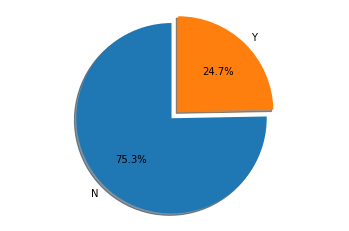

In [4]:
fraud_count = df['fraud_reported'].value_counts('N')
labels = 'N', 'Y'
explode = (0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(fraud_count, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Agrupamiento por edades

Utilizando el método de agrupamiento KMeans, generamos 3 rangos de edades.

Text(0.5, 1.0, 'Reclamos Totales vs Edad')

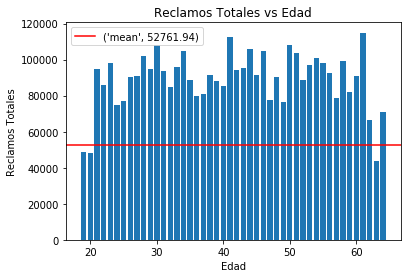

In [208]:
mean = df['total_claim_amount'].mean()
label = 'mean',mean

plt.bar(df['age'],df['total_claim_amount'])

plt.axhline(y=mean, xmin=0, xmax=1,color='red',label=label)
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Reclamos Totales')
plt.title('Reclamos Totales vs Edad')

In [111]:
age = df.loc[:,['age']]

In [222]:
kmeans = KMeans(3)
cluster = kmeans.fit(age)
kmeans_predict = kmeans.fit_predict(age)
clusters = kmeans_predict
age['cluster'] = clusters
age['age'] = df['age']

Text(0.5, 1.0, 'Agrupamiento por edades')

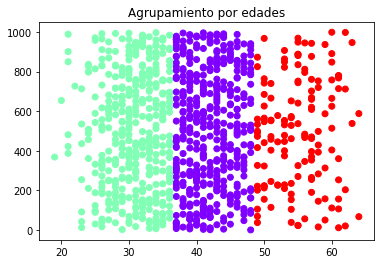

In [209]:
age_range = range(0,1000)
plt.scatter(age['age'],age_range, c=age['Clusters'],cmap='rainbow')
plt.title('Agrupamiento por edades')

### Agrupamiento por Marcas de Autos

Utilizamos variables dummy.
Convertimos variables categóricas en numéricas, a cada marca de auto le asignamos un número. 

In [162]:
pd.unique(df['auto_make'])

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [177]:
cars = df['auto_make']
df['cars'] = df['auto_make'].map({'Saab':1, 'Mercedes':2, 'Dodge':3, 'Chevrolet':4, 'Accura':5, 'Nissan':6,
       'Audi':7, 'Toyota':8, 'Ford':9, 'Suburu':10, 'BMW':11, 'Jeep':12, 'Honda':13,
       'Volkswagen':14})

Text(0.5, 1.0, 'Reclamos totales vs Marca de Auto')

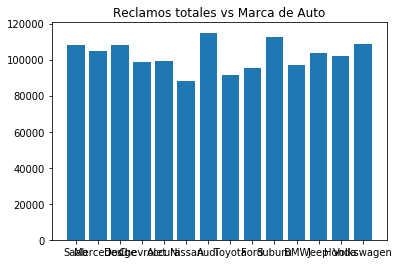

In [211]:
plt.bar(df['auto_make'],df['total_claim_amount'])
plt.title('Reclamos totales vs Marca de Auto')

In [210]:
cars = df.loc[:,['cars']]
kmeans = KMeans(3)
cluster = kmeans.fit(cars)
kmeans_predict = kmeans.fit_predict(cars_km)
cars['cluster'] = kmeans_predict

### Agrupamiento por Sexo

In [221]:
sex = df['insured_sex'].map({'MALE':1,'FEMALE':2})

### Tabla de Datos

Agrupamos todas las variables halladas mas otras necesarias para correr el primer modelo GLM.

In [227]:
categorias_map = pd.DataFrame({'Edad':age['cluster'],
                              'Marca de Auto':cars['cluster'],
                              'Género':sex,
                               'Reclamos Totales': df['total_claim_amount'],
                              'Prima de Poliza':df['policy_annual_premium'],
                              })
categorias_map

,Edad,Marca de Auto,Género,Reclamos Totales,Prima de Poliza
0,1,1,1,71610,1406.91
1,1,1,1,5070,1197.22
2,0,1,2,34650,1413.14
3,1,1,2,63400,1415.74
4,1,2,1,6500,1583.91
5,1,1,2,64100,1351.10
6,0,2,1,78650,1333.35
7,1,2,1,51590,1137.03
8,0,2,2,27700,1442.99
9,1,1,1,42300,1315.68


## Aplicamos el modelo GLM

Utilizamos como variable objetivo la prima de póliza, y como variables explicativas la edad, la marca del auto, el género, y los reclamos totales.

In [230]:
data_exog = categorias_map.loc[:,['Edad','Marca de Auto','Género','Reclamos Totales']]
data_exog = sm.add_constant(data_exog, prepend=False)
data_endog = categorias_map['Prima de Poliza']

In [231]:
glm_binom = sm.GLM(data_endog, data_exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Prima de Poliza   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Apr 2020   Deviance:                   1.0848e+08
Time:                        17:29:44   Pearson chi2:                 7.37e+24
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Edad              3.403e+16   3.07e+06  

### Análisis de los resultados

En esta sección voy a realizar los tests correspondientes para verificar que las variables explicativas son significativas y explican la variable objetivo.

In [235]:
print('A completar...')

A completar...


### Predicciones

En esta sección voy a hacer predicciones y las compararé con la información de la tabla obtenida.